# CS 6180: Clustering
## Assignment 1: K-Center, K-Means and HAC
### Amy Eisenmenger, u1209324

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Problem 1

Implement the K-Center (aka FurthestPoint) algorithm using euclidean distance as the distance function. Using your K-Center implementation, evaluate data1.csv the document with 3 centers and then try with 4 centers. Next assign each point to its nearest center (using euclidean distance as the distance function) and generate a scatter plot where each cluster is represented by a different color. Also, represent the cluster centers as solid black.

Using this same data set run K-Means using 3 centers and produce similar plots as described previously. Compare and contrast the results with K-Centers, what are the differences you are seeing. Feel free to use an out-of-the-box K-Means (eg. sklearn.cluster.KMeans). Finally produce two cost function plots with # centers along the x-axis and cost of that clustering along the y-axis. Do this for both algorithms (K-Center and K-Means).

## K-Centers

In [2]:
def load_data(file):
    dataset =[]
    true_clusters = []
    with open(file, 'r') as f:
        for line in f:
            l = line.rstrip().split(",")
            if "x" in l:
                continue
            dataset.append([float(l[1]), float(l[2])])
            true_clusters.append(int(float(l[-1])))
    f.close()
    return np.array(dataset), np.array(true_clusters)

In [3]:
def euclidean_d(center, points):
    sum_square = np.sum(np.square(center - points), axis=1) #get each element's distance to center a
    return np.sqrt(sum_square)

In [4]:
def k_centers(data, k, i=20 ):
	c0 = data[i]							# arbitrarily select first center
	centers = np.array([c0]) 				# k centers
	clusters = np.zeros(len(data), dtype = int) 			# current cluster center assignment, initially assign to first cluster
	phis = euclidean_d(c0, data) 			# distances to current cluster center assignment
	for i in range(1,k):			
		max_distance = phis.max()			# get point with max distance to nearest cluster center 
		c_i = data[np.argmax(phis)] 		# get center coordinates
		centers = np.append(centers, [c_i], axis = 0) # add to centers
		new_dist = euclidean_d(c_i, data)			# calculate all distances to new center
		new_phis = np.minimum(phis, new_dist)		# get (min) distance to closest center
		change_points = np.where(phis != new_phis)	# find points closer to new center than their old centers
		clusters[change_points] = i  				# move those points to the new cluster
		phis = new_phis								# update global distances
	cost = phis.max()
	return centers, clusters, cost

In [5]:
def plot_clusters(data, centers, clusters, title):
    plt.scatter(data[:,1],data[:,0], c=clusters, cmap='rainbow', alpha=0.5)
    plt.scatter(centers[:,1], centers[:,0], color="black")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

def plot_costs(ks, costs, label, dataset=1):
    plt.plot(ks, costs, color ='blue')
    plt.xlabel('# of centers')
    plt.ylabel('cost')
    plt.title("Cost of " + label + " Clustering")
    plt.show()
    

In [6]:
file ="data1.csv"
data, true_clusters = load_data(file)

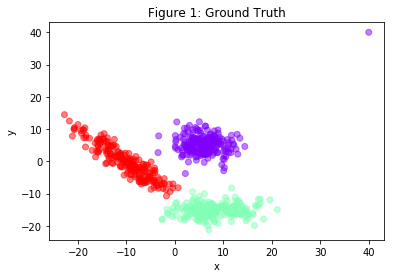

In [7]:
plt.scatter(data[:,1],data[:,0], c=true_clusters, cmap='rainbow', alpha=0.5)
plt.title("Figure 1: Ground Truth")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

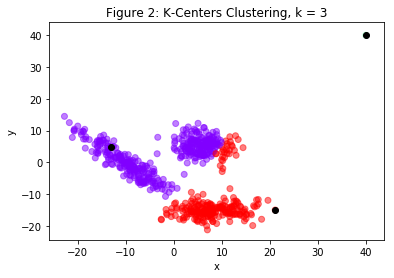

In [8]:
k = 3
centers, clusters, cost = k_centers(data,k)
plot_clusters(data, centers, clusters,"Figure 2: K-Centers Clustering, k = %i" %k)


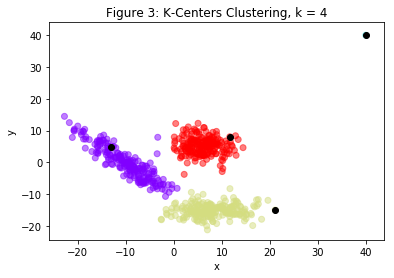

In [9]:
k = 4
centers, clusters, cost = k_centers(data,k)
plot_clusters(data, centers, clusters,"Figure 3: K-Centers Clustering, k = %i" %k)

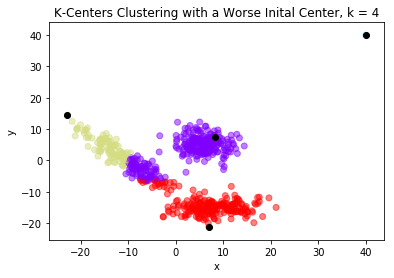

In [10]:
k = 4
centers, clusters, cost = k_centers(data,k, 0)
plot_clusters(data, centers, clusters,"K-Centers Clustering with a Worse Inital Center, k = %i" %k)

## K-Means

In [11]:
def k_means(data,k):
	# k_means wrapper function
	kmeans = KMeans(n_clusters=k, init='k-means++')
	kmeans.fit(data)
	return kmeans.cluster_centers_, kmeans.labels_, kmeans.inertia_

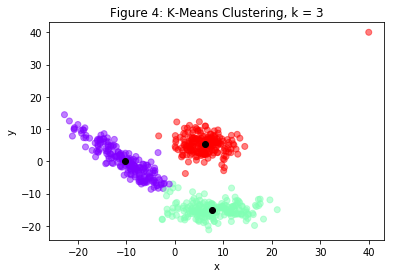

<Figure size 432x288 with 0 Axes>

In [12]:
k = 3
centersm3, clustersm3, cost = k_means(data,k)
plot_clusters(data, centersm3, clustersm3, "Figure 4: K-Means Clustering, k = %i" %k)
plt.clf()

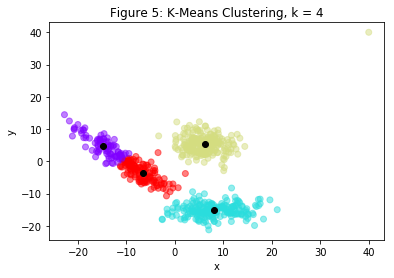

<Figure size 432x288 with 0 Axes>

In [13]:
k = 4
centers, clusters, cost = k_means(data,k)
plot_clusters(data, centers, clusters, "Figure 5: K-Means Clustering, k = %i" %k)
plt.clf()

## K-Centers vs. K-Means

As seen in Figure 1, the true clusterings as defined by the given data, the data consists of three dense clusters whose points all lie in x = [-25,20] and y =[-25, 25]. There is one outlier that lies at (40,40) and is included in teh nearest cluster defined by euclidean distance. Two of the large clusters are relatively circular (central purple and lower green) while one is more elongated (red) and has lower x values than the other two. 

K-centers was able to identify these clusters, but was highly sensitive to the initial center, outliers, and the k value. Since K-centers minimizes the maximum distance from any point to its nearest cluster center, the algorithm iteratively selects the point furthest from its nearest cluster center as the next cluster center. The result is that given some initial center, it finds extreme points as cluster centers. When the initial center selected was one of the points with an x or y value near -25 for the outlier at (40,40), the algorithm visually performed well. However, if the initial point was in the center of one of the dense clusters, performance dropped significantly. I tried arbitrarily setting the first center to data[0], the first point in the file, and data[20], which happened to be a fairly good center in the upper part of the elongated red cluster. In all cases, the outlier was selected as one of the centers. 

The value of k also had a significant effect on k-centers performance. As already noted, the outlier at (40,40) was always selected as a center for k = 3 and k = 4. Since it is farther from all the other points than they are to eachother, the outlier always remained in a cluster by itself once selected as a center. The true cluster labelings provided by the datase divide the data into k = 3 clusters. However, when k = 3 for k-centers, it selected points at coordinates [4.98, -13.17], [40, 40], and [-14.99, 21.12] as center. This resulted in the outlier was selected as one center. The remaining centers wer in the elongated and lower clusters. Aside from the outlier, the remaining datapoints were divided into two clusters (Figure 2), which was correct for the elongated and lower clusters but split the central cluster. Keeping these same centers and adding a fourth (at [8.05, 11.67]) for k = 4 resulted in quite a good clustering of points, with a major exception for the outlier in a cluster by itself, and a few points floating between the red and purple cluster (Figure 3).


K-means was also able to identify the clusters and was not sensitive to outliers. K-means minimizes the average distance from points to their nearest cluster center, resulting in the centers potentially changing every time a new center is added. Since it optimizes for average distance, the algorithm can be more robust to outliers. For this dataset, k-means was able to achieve a good clustering at k = 3 with centers at [5.35, 6.22], [-15.01, 7.76], and [0.09, -10.28] (Figure 4). The outlier was included in the dense central cluster with a center at [5.35, 6.22]. However, due to the elongated cluster being in fact elongated, the center of the lower cluster was actually closer to some points and those points were mis-labelled. When another center was added for k = 4, the centers shifted to be [5.4, 6.24], [-15.2, 8.01], [ -3.58, -6.57], and [4.68, -14.76], effectively splitting the elongated cluster into two clusters (Figure 5). 

Overall, k-centers (with k=4) and k-means (with k=3) were both able to produce reasonably good clusterings of the data. K-means seemed to be more robust to outliers at lower values of k than k-centers. K-centers was also more sensitive to the initial center selected.

## Cost of Clustering

Text(0.5, 1.0, 'K-Means')

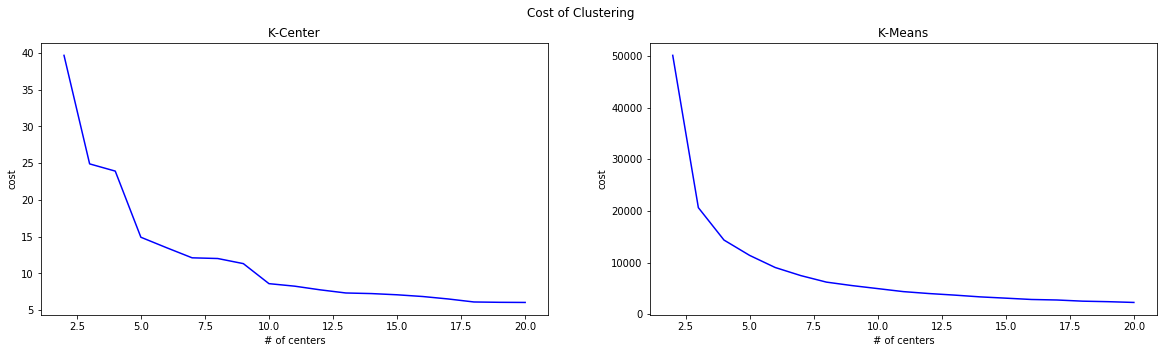

In [14]:
ks = np.arange(2,21)
costs_k_center = []
costs_k_means = []
for k in ks:
    # k centers
	centers, clusters, cost = k_centers(data,k)
	costs_k_center.append(cost)
	#k means
	centers, clusters, cost = k_means(data,k)
	costs_k_means.append(cost)
fig, axs = plt.subplots(1,2,figsize=(20, 5))

fig.suptitle("Cost of Clustering")
axs[0].plot(ks, costs_k_center, color ='blue')
axs[0].set_xlabel('# of centers')
axs[0].set_ylabel('cost')
axs[0].set_title("K-Center")
axs[1].plot(ks, costs_k_means, color ='blue')
axs[1].set_xlabel('# of centers')
axs[1].set_ylabel('cost')
axs[1].set_title("K-Means")
# fig.show()
# plot_costs(ks, costs_k_center, 'K-Center')
# plot_costs(ks, costs_k_means, 'K-Means')

### Cost Discussion

The cost for both k-centers and k-means drops quickly between k = 2 and k = 5 before levelling out and having diminishing returns for more centers. These functions seem to indicate that most of the information can be captured and clustered with smaller values of k

# Problem 2

## Generate own data for K-Means

In [15]:
from sklearn.datasets import make_blobs, make_moons, make_circles

In [16]:
n = 300
centers = [(-9,0),(6,6),(0,3)]
data_gen1, labels_gen1 = make_blobs(n_samples=n, centers=centers, n_features=2)
data_gen2, labels_gen2 = make_blobs(n_samples=n, centers=8, n_features=2, cluster_std = 1)
data_gen3, labels_gen3 = make_blobs(n_samples=n, centers=8, n_features=2, cluster_std = 1.5)

n=500
data_gen4, labels_gen4 = make_blobs(n_samples=n, centers=7, n_features=2, cluster_std = 0.2)

centers = [(0,0),(3,0),(3,3),(0,3)]
data_gen5, labels_gen5 = make_blobs(n_samples=n, centers=centers, n_features=2, cluster_std = 2.0)

n=1000
data_gen6, labels_gen6 = make_blobs(n_samples=n, centers=7, n_features=2, cluster_std = 3.0)


Text(0.5, 1.0, 'Set 6')

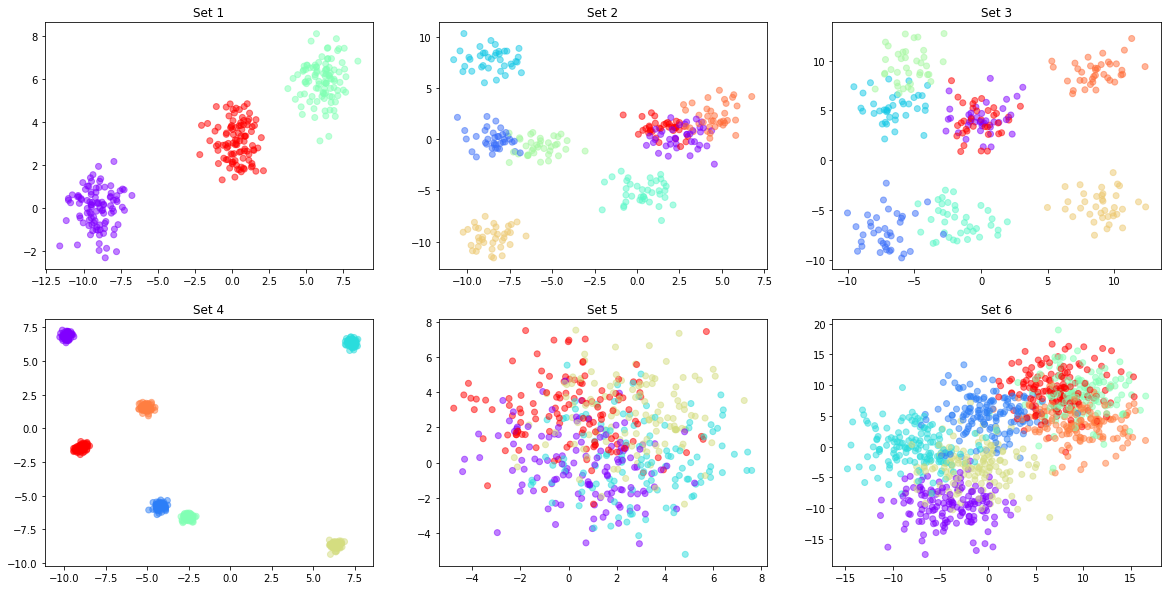

In [17]:
# plot sets
fig, axs = plt.subplots(2,3,figsize=(20, 10))
axs[0][0].scatter(data_gen1[:,0], data_gen1[:,1], c = labels_gen1, cmap='rainbow', alpha=0.5);
axs[0][0].set_title("Set 1")
axs[0][1].scatter(data_gen2[:,0], data_gen2[:,1], c = labels_gen2, cmap='rainbow', alpha=0.5);
axs[0][1].set_title("Set 2")
axs[0][2].scatter(data_gen3[:,0], data_gen3[:,1], c = labels_gen3, cmap='rainbow', alpha=0.5);
axs[0][2].set_title("Set 3")
axs[1][0].scatter(data_gen4[:,0], data_gen4[:,1], c = labels_gen4, cmap='rainbow', alpha=0.5);
axs[1][0].set_title("Set 4")
axs[1][1].scatter(data_gen5[:,0], data_gen5[:,1], c = labels_gen5, cmap='rainbow', alpha=0.5);
axs[1][1].set_title("Set 5")
axs[1][2].scatter(data_gen6[:,0], data_gen6[:,1], c = labels_gen6, cmap='rainbow', alpha=0.5);
axs[1][2].set_title("Set 6")
# fig.show()
# plot cost

Text(0.5, 1.0, 'Set 6')

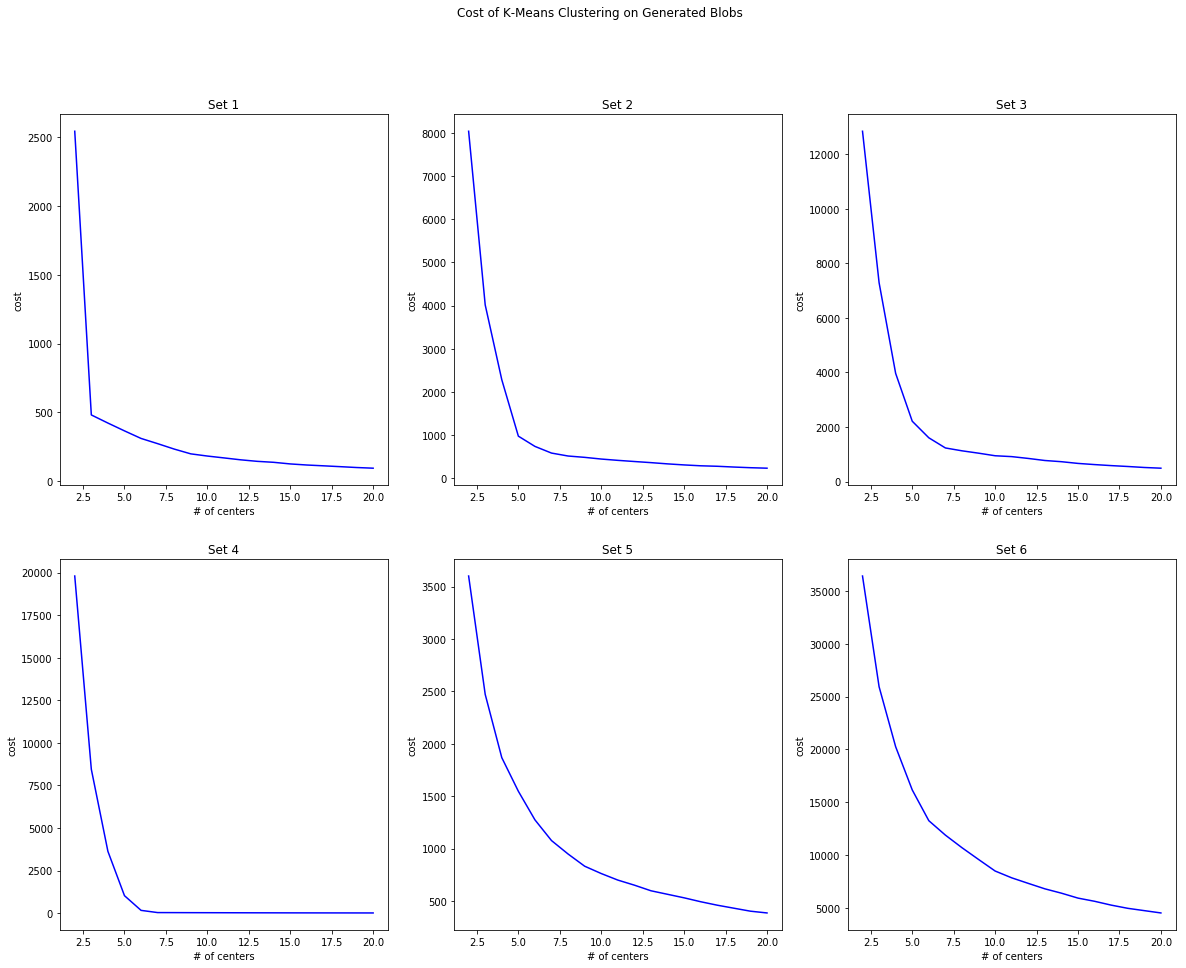

In [18]:
fig, axs = plt.subplots(2,3,figsize=(20, 15))
fig.suptitle("Cost of K-Means Clustering on Generated Blobs")
ks = np.arange(2,21)


costs = []
d = data_gen1
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[0][0].plot(ks, costs, color ='blue')
axs[0][0].set_xlabel('# of centers')
axs[0][0].set_ylabel('cost')
axs[0][0].set_title("Set 1")

costs = []
d = data_gen2
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[0][1].plot(ks, costs, color ='blue')
axs[0][1].set_xlabel('# of centers')
axs[0][1].set_ylabel('cost')
axs[0][1].set_title("Set 2")

costs = []
d = data_gen3
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[0][2].plot(ks, costs, color ='blue')
axs[0][2].set_xlabel('# of centers')
axs[0][2].set_ylabel('cost')
axs[0][2].set_title("Set 3")

costs = []
d = data_gen4
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[1][0].plot(ks, costs, color ='blue')
axs[1][0].set_xlabel('# of centers')
axs[1][0].set_ylabel('cost')
axs[1][0].set_title("Set 4")

costs = []
d = data_gen5
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[1][1].plot(ks, costs, color ='blue')
axs[1][1].set_xlabel('# of centers')
axs[1][1].set_ylabel('cost')
axs[1][1].set_title("Set 5")

costs = []
d = data_gen6
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[1][2].plot(ks, costs, color ='blue')
axs[1][2].set_xlabel('# of centers')
axs[1][2].set_ylabel('cost')
axs[1][2].set_title("Set 6")

In [19]:
n_samples = 1500
noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
blobs = make_blobs(n_samples=n_samples, random_state=8, cluster_std = 1.5)
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied =make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


Text(0.5, 1.0, 'Varied Blobs')

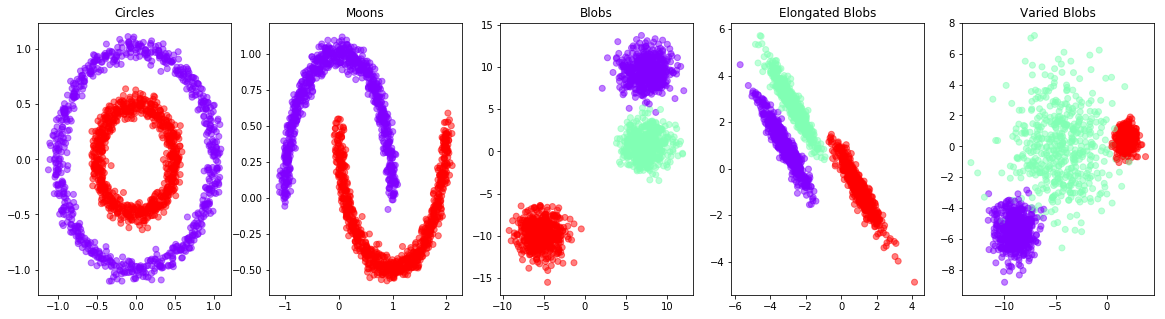

In [20]:
fig, axs = plt.subplots(1,5,figsize=(20, 5))
axs[0].scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], c = noisy_circles[1], cmap='rainbow', alpha=0.5);
axs[0].set_title("Circles")
axs[1].scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], c = noisy_moons[1], cmap='rainbow', alpha=0.5);
axs[1].set_title("Moons")
axs[2].scatter(blobs[0][:,0], blobs[0][:,1], c = blobs[1],  cmap='rainbow', alpha=0.5);
axs[2].set_title("Blobs")
axs[3].scatter(aniso[0][:,0], aniso[0][:,1], c = aniso[1], cmap='rainbow', alpha=0.5);
axs[3].set_title("Elongated Blobs")
axs[4].scatter(varied[0][:,0], varied[0][:,1], c = varied[1], cmap='rainbow', alpha=0.5);
axs[4].set_title("Varied Blobs")
# axs[1][2].scatter(data_gen6[:,0], data_gen6[:,1], c = labels_gen6, cmap='rainbow', alpha=0.5);
# axs[1][2].set_title("Set 6")

Text(0.5, 1.0, 'Varied Blobs')

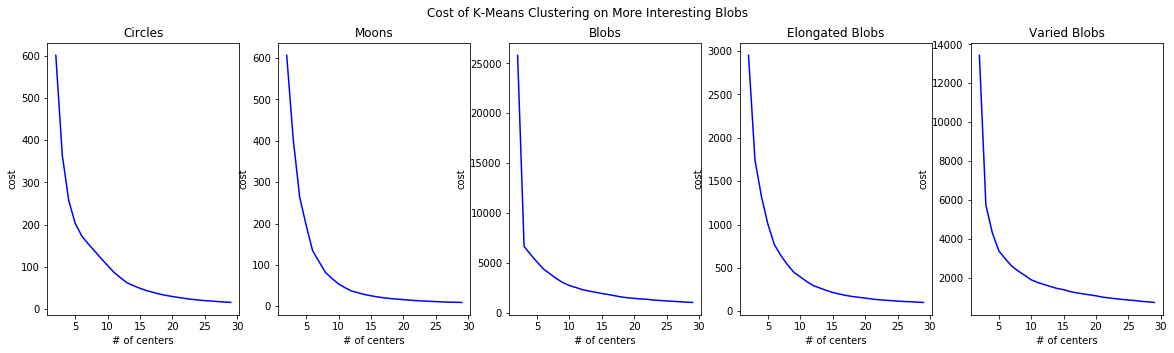

In [21]:
fig, axs = plt.subplots(1,5,figsize=(20, 5))
fig.suptitle("Cost of K-Means Clustering on More Interesting Blobs")
ks = np.arange(2,30)

costs = []
d = noisy_circles[0]
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[0].plot(ks, costs, color ='blue')
axs[0].set_xlabel('# of centers')
axs[0].set_ylabel('cost')
axs[0].set_title("Circles")

costs = []
d = noisy_moons[0]
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[1].plot(ks, costs, color ='blue')
axs[1].set_xlabel('# of centers')
axs[1].set_ylabel('cost')
axs[1].set_title("Moons")

costs = []
d = blobs[0]
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[2].plot(ks, costs, color ='blue')
axs[2].set_xlabel('# of centers')
axs[2].set_ylabel('cost')
axs[2].set_title("Blobs")

costs = []
d = aniso[0]
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[3].plot(ks, costs, color ='blue')
axs[3].set_xlabel('# of centers')
axs[3].set_ylabel('cost')
axs[3].set_title("Elongated Blobs")

costs = []
d = varied[0]
for k in ks:
	#k means
	centers, clusters, cost = k_means(d,k)
	costs.append(cost)
axs[4].plot(ks, costs, color ='blue')
axs[4].set_xlabel('# of centers')
axs[4].set_ylabel('cost')
axs[4].set_title("Varied Blobs")


## Cost of Clustering on Generated Datasets

I used sklearn's make_blobs function to create 6 datasets of varying number of Gaussian clusters, standard deviation, and mean (as determined by defined centers or random placment). I also created datasets consisting of circles, half-moons, elongated blobs, and blobs with differing standard deviation to compare against the performance on the Gaussians.

Generally, the more distinct the clusters, the more square the cost and the less distinct the clusters, the more gentle the cost curve. For tight (low standard deviation) or distinct clusters as in sets 1 and 4, cost drops sharply as k increases up to the the number of actual clusters in the generated set and then remains flat as k continues to increase. These types of clusters are easy for k-means to identify because the center of each true cluster is very close to the calculated mean of the cluster. Thus when k approaches and matches the actual number of clusters, costs drop dramatically due to the estimated centers converging with the true clusters. After the true k has been reached, splitting into more clusters has relatively little effect on the cost because the mean distances to the cluster center are already small.

For sets like 2 and 3, where clusters are more diffuse or overlapping, the cost function still drops quickly as k increases initially, but levels off more gradually. It is still possible to discern corners at or near the acutal number of clusters after which the cost decreases less quickly. This again makes sense because the clusters are still relatively distinct so finding k centers around the true number of clusters again converges with the true centers. However since the clusters are not as tight or overlap more, they do not converge as closely. Visually the overlap zone bewteen some clusters makes it difficult to identify which points belong to which cluster. The lack of clarity is reflected in the cost function.

For very diffuse (high standard deviation) or ambiguous (highly overlapping) clusters like sets 5 and 6, the cost decrease relatively slowly and smoothly, with no clear turning-point near the actual number of clusters. 

In the second experiment, the varied blobs caused some problems from k-means. The curve here was like the diffuse and overlapping Gaussians of sets 5 and 6.  The non-Gaussian shapes like the circles, moons, and elongated blobs have cost curves similar to the very diffuse Gaussians for the first experiment. The moons and elongated blobs are not quite as rounded as the concentric circles and the varied blobs. Both the moons and the elongated blobs have dense, tight clusters with little standard deviation, which k-means seems to handle relatively well. The clusters in both of these sets are distinctly separate and K-means can find separate centers.

K-means really fails for clustering the concentric circles, but the center point that would minimize the average cost of all the points in each cluster is actually the same point at the center of both circles. K-means has no hope of clustering more than half of either cluster correctly.

# Problem 3

## K-Means on Dataset 2 

In [22]:
data2, true_clusters = load_data("data2.csv")

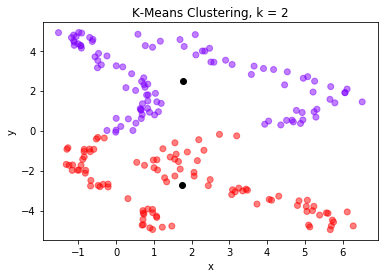

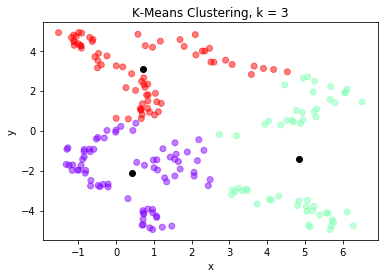

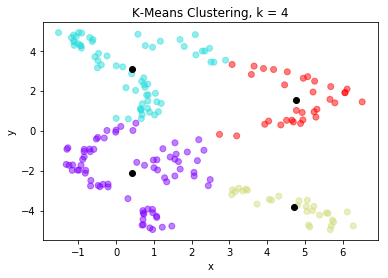

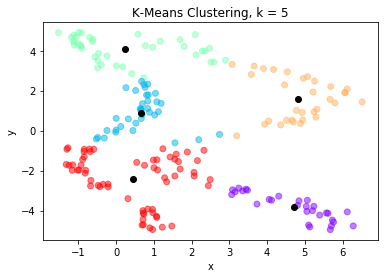

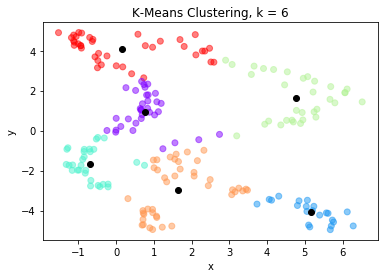

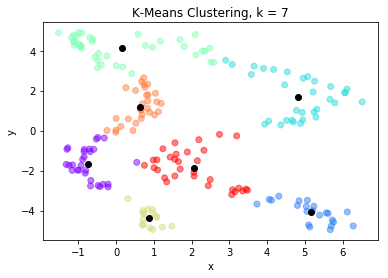

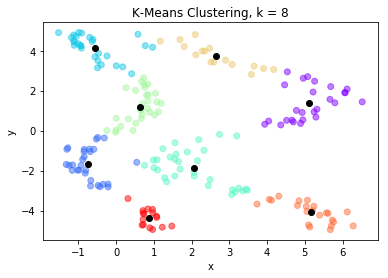

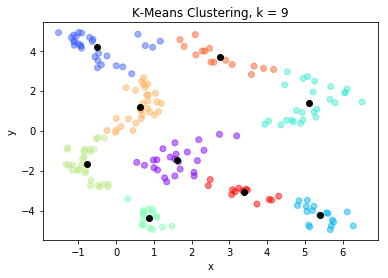

In [24]:
costs = []
ks = np.arange(2,10)
for k in ks:
    centers, clusters, cost = k_means(data2,k)
    plot_clusters(data2, centers, clusters, "K-Means Clustering, k = %i" %k)

    costs.append(cost)

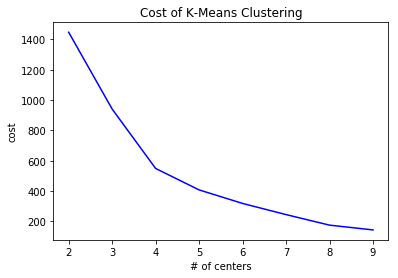

In [25]:
plot_costs(ks, costs, 'K-Means')

## Discussion

The structure of the second dataset consists of what visually appears to be points within a small standard deviation of two wave functions of different amplitude, with the wave of higher amplitude shifted along the y-axis by ~4. 

K-means is not able to make sense of the data. At low values of k, the centers of the supposed clusters are not actually very close to any of the point in the cluster. Only for values k>5 do the centers actually fall within a relatively small distance of the closest points in that cluster. Looking at the cost of clustering vs. k, the cost drops quite gradually, with a slight corner at k = 4, though when plotted, this just appears to be dividing the waves into quadrants first along an approximately horizontal line at y = 2.5 and then vertical line at x around 0. However the clustering makes very little distinction between the waves, clustering the troughs of the upper wave with the lower wave. We need a different way to cluster this data meaningfully.

# Problem 4

## Hierarchical Clustering

In [26]:
# distance calculations
def single_link_d(S1,S2):
	min_distance = min(euclidean_d(S1[0], S2))
	for i in range(1,len(S1)):
		d = min(euclidean_d(S1[i], S2))
		if d < min_distance:
			min_distance = d
	return min_distance

def complete_link_d(S1,S2):
	max_distance = max(euclidean_d(S1[0], S2))
	for i in range(1,len(S1)):
		max_d = max(euclidean_d(S1[i], S2))
		if max_d > max_distance:
			max_distance = max_d
	return max_distance


def mean_link_d(S1,S2):
	a1 = np.sum(S1, axis = 0)/len(S1)
	a2 = np.sum(S2, axis = 0)/len(S2)
	d = np.sqrt(np.sum(np.square(a1-a2)))
	return d

In [27]:
def hierarchical_cluster(data, distance_function, k):
	sets = [[d] for d in data]
	# repeat cluster merging until there are k sets
	while len(sets) > k:
		# find closest two sets
		closest_clusters = (0,1)
		distance = distance_function(sets[0], sets[1])
		for i in range(0, len(sets)):
			s1 = sets[i]

			for j in range(i + 1, len(sets)):
				s2 = sets[j]
				set_distance = distance_function(s1,s2)
				if set_distance < distance:
					distance = set_distance
					closest_clusters = (i,j)
		new_cluster = np.vstack((sets[closest_clusters[0]], sets[closest_clusters[1]]))
		# print(new_cluster)
		sets[closest_clusters[0]] = new_cluster
		sets.pop(closest_clusters[1])
	return sets

In [28]:
def plot_hierarchy(clusters, k, distance):
	x_axis = []
	y_axis = []
	labels = []
	for i in range(len(clusters)):
		s = clusters[i]
		x_axis = np.append(x_axis, s[:,0])
		y_axis = np.append(y_axis, s[:,1])
		labels = np.append(labels, [i]*len(s))
	plt.scatter(x_axis, y_axis, c = labels)

	plt.title("Hierarchical Clustering k = %i, %s" % (k, distance))
	plt.show()

In [29]:
k = 2
d_function = single_link_d
clusters2 = hierarchical_cluster(data2, d_function, k)

k=3 
clusters3 = hierarchical_cluster(data2, d_function, k)

k=4
clusters4 = hierarchical_cluster(data2, d_function, k)
# plot_hierarchy(clusters, k, 'Single Link')

Text(0.5, 1.0, 'k = 4')

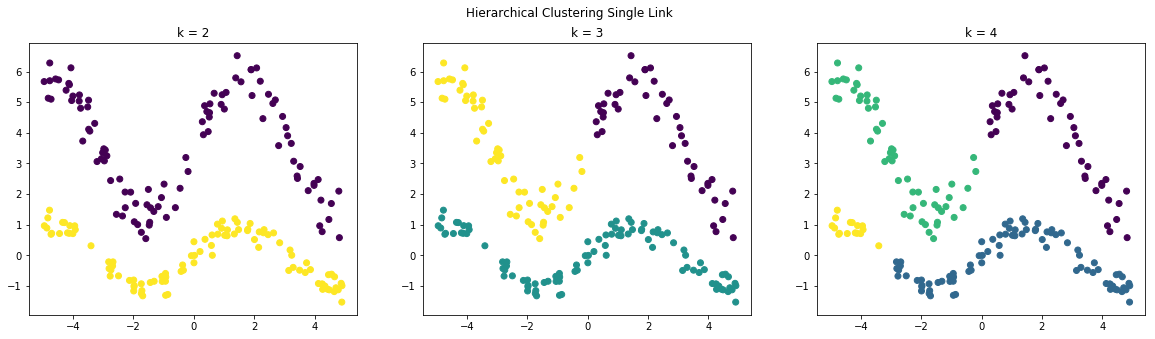

In [30]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))
fig.suptitle("Hierarchical Clustering Single Link")
x_axis = []
y_axis = []
labels = []
for i in range(len(clusters2)):
    s = clusters2[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[0].scatter(x_axis, y_axis, c = labels)
axs[0].set_title("k = 2")

x_axis = []
y_axis = []
labels = []
for i in range(len(clusters3)):
    s = clusters3[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[1].scatter(x_axis, y_axis, c = labels)
axs[1].set_title("k = 3")


x_axis = []
y_axis = []
labels = []
for i in range(len(clusters4)):
    s = clusters4[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[2].scatter(x_axis, y_axis, c = labels)
axs[2].set_title("k = 4")

In [31]:
k = 2
d_function = complete_link_d
clusters2 = hierarchical_cluster(data2, d_function, k)


k = 3
clusters3 = hierarchical_cluster(data2, d_function, k)

k = 4
clusters4 = hierarchical_cluster(data2, d_function, k)


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


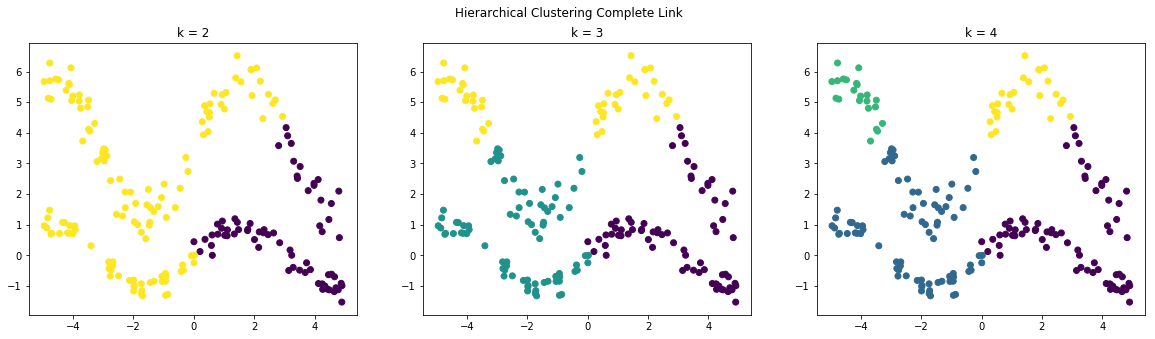

In [32]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))
fig.suptitle("Hierarchical Clustering Complete Link")
x_axis = []
y_axis = []
labels = []
for i in range(len(clusters2)):
    s = clusters2[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[0].scatter(x_axis, y_axis, c = labels)
axs[0].set_title("k = 2")

x_axis = []
y_axis = []
labels = []
for i in range(len(clusters3)):
    s = clusters3[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[1].scatter(x_axis, y_axis, c = labels)
axs[1].set_title("k = 3")


x_axis = []
y_axis = []
labels = []
for i in range(len(clusters4)):
    s = clusters4[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[2].scatter(x_axis, y_axis, c = labels)
axs[2].set_title("k = 4")
fig.show()

In [33]:
k = 2
d_function = mean_link_d
clusters2 = hierarchical_cluster(data2, d_function, k)

k=3
clusters3 = hierarchical_cluster(data2, d_function, k)

k=4
clusters4 = hierarchical_cluster(data2, d_function, k)

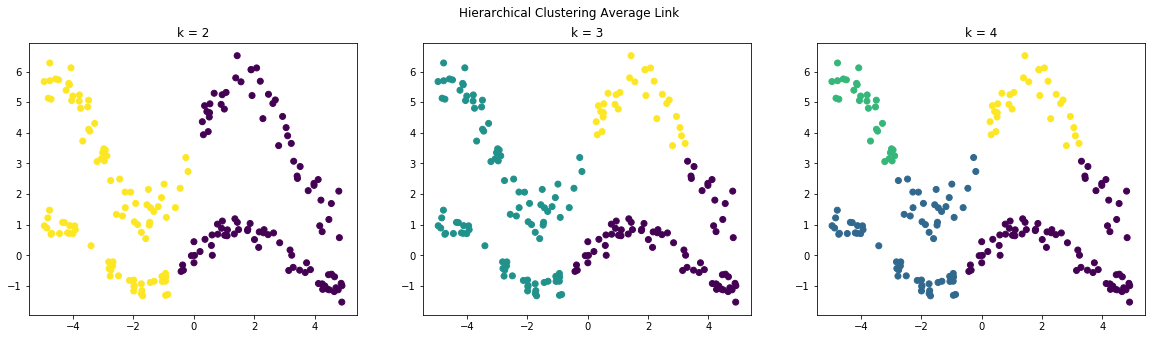

In [34]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))
fig.suptitle("Hierarchical Clustering Average Link")
x_axis = []
y_axis = []
labels = []
for i in range(len(clusters2)):
    s = clusters2[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[0].scatter(x_axis, y_axis, c = labels)
axs[0].set_title("k = 2")

x_axis = []
y_axis = []
labels = []
for i in range(len(clusters3)):
    s = clusters3[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[1].scatter(x_axis, y_axis, c = labels)
axs[1].set_title("k = 3")


x_axis = []
y_axis = []
labels = []
for i in range(len(clusters4)):
    s = clusters4[i]
    x_axis = np.append(x_axis, s[:,0])
    y_axis = np.append(y_axis, s[:,1])
    labels = np.append(labels, [i]*len(s))
axs[2].scatter(x_axis, y_axis, c = labels)
axs[2].set_title("k = 4")
fig.show()

## HAC Discussion

Hierarchical Agglomerative Clustering (HAC) begins with each point in its own cluster and iteratively merges the two closest clusters until there are the desirec number of clusters(k). Closeness is determined by the distance function selected. Here I implemented HAC with three distance functions, single-link, complete-link, and average-link and evaluated them all at k = 2, k = 3, and k = 4 on the second dataset provided. As discussed in problem 3, the structure of the second dataset consists of what visually appears to be points within a small standard deviation of two wave functions of different amplitude, with the wave of higher amplitude shifted along the y-axis by ~4. 

HAC using single-link distance consistently produced clusters that made the most sense visually to me. At k = 2, single-link HAC captured the two wave structures quite well. As k increased, single-link segmented each wave, but no cluster mixed points in one wave with points in the other. 

Average-link and complete-linkproduced results similar to k-means in the previous problem. Average-link seemed to cluster points first (k=2) by their x-value as approximately higher and lower than 0, and then at higher values (k=3 and k=4) by their amplitude, with each high-amplitude peak on the top wave being isolated by each additional cluster. This could be a good clustering if points are clustered based on their graph quadrant with origin ~[0,4]. Complete-link clustered first along the x-value and then the y-value. By k=4, the clusters seem to converge with the average-link clustering at k = 4.

### Dendrogram Vizualization of Clustering

I was not able to plug the results of my hierarchical clustering algorithm into an existing dendrogram implementation, but used SciPy's linkage and dendrogram functions on my euclidean distance matrix to visualize a similar clustering process below for single-link, complete-link, and average-link distance calculations. Plots are shown below.

Single link, which performed the best out of all the distance function, keeps small clusters much longer (relative to when a single cluster is obtained) and merges into larger clusters relatively late. Complete and average link quickly merge points into tens of clusters, but then take longer to merge these larger clusters together.

In [35]:
dist_M = np.zeros((len(data2), len(data2)))
for i in range(len(data2)):
    dist_M[i,:] = euclidean_d(data2[i], data2)

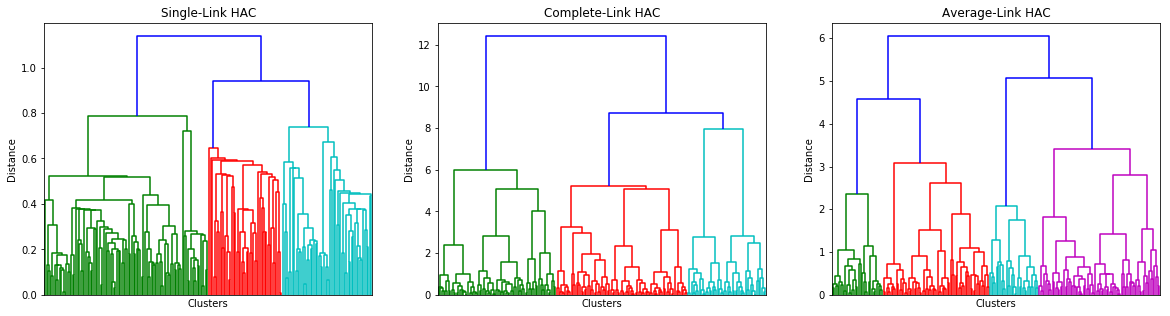

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

fig, axs = plt.subplots(1,3,figsize=(20, 5))
dists = squareform(dist_M)

linkage_matrix = linkage(dists, "single")
single = dendrogram(linkage_matrix, ax=axs[0], labels=None)
axs[0].set_title("Single-Link HAC")
axs[0].set_xlabel("Clusters")
axs[0].set_ylabel("Distance")
axs[0].set_xticks([])

linkage_matrix = linkage(dists, "complete")
complete = dendrogram(linkage_matrix, ax = axs[1])
axs[1].set_title("Complete-Link HAC")
axs[1].set_xlabel("Clusters")
axs[1].set_ylabel("Distance")
axs[1].set_xticks([])

linkage_matrix = linkage(dists, "average")
mean = dendrogram(linkage_matrix, ax=axs[2])
axs[2].set_title("Average-Link HAC")
axs[2].set_xlabel("Clusters")
axs[2].set_ylabel("Distance")
axs[2].set_xticks([])
fig.show()